##Importing Data and Exploring its Contents

In [ ]:
import pandas as pd

In [ ]:
!wget https://raw.githubusercontent.com/msrinag/pygroupprojectub/main/car_resale_prices.csv

--2024-02-26 21:29:16--  https://raw.githubusercontent.com/msrinag/pygroupprojectub/main/car_resale_prices.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2824805 (2.7M) [text/plain]
Saving to: ‘car_resale_prices.csv.1’

car_resale_prices.c 100%[===================>]   2.69M  --.-KB/s    in 0.05s   

2024-02-26 21:29:16 (56.5 MB/s) - ‘car_resale_prices.csv.1’ saved [2824805/2824805]



In [ ]:
data = pd.read_csv("/content/car_resale_prices.csv")
rowsload=data.shape[0]
print("Number of Rows:",rowsload) #>2000 so meets requirement for project
data.head()

Number of Rows: 17446


,Unnamed: 0,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city
0,0,2017 Maruti Baleno 1.2 Alpha,₹ 5.45 Lakh,2017,1197 cc,Third Party insurance,Manual,"40,000 Kms",First Owner,Petrol,83.1bhp,5.0,21.4 kmpl,Hatchback,Agra
1,1,2018 Tata Hexa XTA,₹ 10 Lakh,2018,2179 cc,Third Party insurance,Automatic,"70,000 Kms",First Owner,Diesel,153.86bhp,7.0,17.6 kmpl,MUV,Agra
2,2,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra
3,3,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra
4,4,2009 Hyundai i10 Magna 1.1,₹ 1.60 Lakh,2009,1086 cc,Third Party insurance,Manual,"80,000 Kms",First Owner,Petrol,68.05bhp,5.0,19.81 kmpl,Hatchback,Agra


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17446 entries, 0 to 17445
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         17446 non-null  int64  
 1   full_name          17446 non-null  object 
 2   resale_price       17446 non-null  object 
 3   registered_year    17377 non-null  object 
 4   engine_capacity    17432 non-null  object 
 5   insurance          17439 non-null  object 
 6   transmission_type  17446 non-null  object 
 7   kms_driven         17443 non-null  object 
 8   owner_type         17401 non-null  object 
 9   fuel_type          17446 non-null  object 
 10  max_power          17344 non-null  object 
 11  seats              17436 non-null  float64
 12  mileage            16938 non-null  object 
 13  body_type          17446 non-null  object 
 14  city               17446 non-null  object 
dtypes: float64(1), int64(1), object(13)
memory usage: 2.0+ MB


In [ ]:
data.isnull().any()

Unnamed: 0           False
full_name            False
resale_price         False
registered_year       True
engine_capacity       True
insurance             True
transmission_type    False
kms_driven            True
owner_type            True
fuel_type            False
max_power             True
seats                 True
mileage               True
body_type            False
city                 False
dtype: bool

In [ ]:
data.isnull().sum()

Unnamed: 0             0
full_name              0
resale_price           0
registered_year       69
engine_capacity       14
insurance              7
transmission_type      0
kms_driven             3
owner_type            45
fuel_type              0
max_power            102
seats                 10
mileage              508
body_type              0
city                   0
dtype: int64

In [ ]:
data.columns

Index(['Unnamed: 0', 'full_name', 'resale_price', 'registered_year',
       'engine_capacity', 'insurance', 'transmission_type', 'kms_driven',
       'owner_type', 'fuel_type', 'max_power', 'seats', 'mileage', 'body_type',
       'city'],
      dtype='object')

##Data Clenaing/Processing

#### 1. Removing Unwanted Columns
# Dropping the 'Unnamed: 0' column.


In [ ]:
data=data.drop('Unnamed: 0',axis=1)
data.head()

,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city
0,2017 Maruti Baleno 1.2 Alpha,₹ 5.45 Lakh,2017,1197 cc,Third Party insurance,Manual,"40,000 Kms",First Owner,Petrol,83.1bhp,5.0,21.4 kmpl,Hatchback,Agra
1,2018 Tata Hexa XTA,₹ 10 Lakh,2018,2179 cc,Third Party insurance,Automatic,"70,000 Kms",First Owner,Diesel,153.86bhp,7.0,17.6 kmpl,MUV,Agra
2,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra
3,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra
4,2009 Hyundai i10 Magna 1.1,₹ 1.60 Lakh,2009,1086 cc,Third Party insurance,Manual,"80,000 Kms",First Owner,Petrol,68.05bhp,5.0,19.81 kmpl,Hatchback,Agra



#### 2. Handling Duplicates
# Checking for and removing duplicate rows.

In [ ]:
part = data[data.duplicated(keep=False)].shape[0]
print(f'have {100*part/data.shape[0]}% of duplicates values')
data = data.drop_duplicates()

have 2.2755932591998165% of duplicates values


#### 3. Handling Missing Values
# Dropping rows with missing values.



In [ ]:
data.dropna(inplace = True)

<ipython-input-10-48a623a66630>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace = True)


In [ ]:
newrows=data.shape[0]
print(f'loss in recrods ={(rowsload-newrows)} approx {((rowsload-newrows)/rowsload)*100:.2f} in %' ) # Not a significant drop

loss in recrods =848 approx 4.86 in %


#### 4. Converting Price to Integer
# Converting resale_price to integer format.

In [ ]:
data.resale_price
# before cleaning in lakh crores and 80,000 converitng it into a integer type

0         ₹ 5.45 Lakh
1           ₹ 10 Lakh
2         ₹ 4.50 Lakh
4         ₹ 1.60 Lakh
5         ₹ 4.70 Lakh
             ...     
17441     ₹ 3.25 Lakh
17442    ₹ 20.75 Lakh
17443     ₹ 8.35 Lakh
17444    ₹ 13.95 Lakh
17445     ₹ 6.50 Lakh
Name: resale_price, Length: 16598, dtype: object

In [ ]:
import re
import copy

def extract_float_from_string(input_string):
    # Use regular expression to find a float in the string
    match = re.search(r'\d+\.\d+|\d+', input_string)

    if match:
        # Convert the matched string to a float
        float_value = float(match.group())
        return float_value
    else:
        # Return None if no float is found
        return None

def converttoprice(item):
    # Price
    item['full_name'] = item['full_name'][5::]
    if 'lakh' in item['resale_price'].lower():
        item['resale_price'] = extract_float_from_string(item['resale_price']) * 100000
    elif 'crore' in item['resale_price'].lower():
        item['resale_price'] = extract_float_from_string(item['resale_price']) * 10000000
    else:
        item['resale_price'] = extract_float_from_string(item['resale_price']) * 1000
    return item


data= data.apply(lambda row: converttoprice(row), axis=1)

data.resale_price # after converting

0         545000.0
1        1000000.0
2         450000.0
4         160000.0
5         470000.0
           ...    
17441     325000.0
17442    2075000.0
17443     835000.0
17444    1395000.0
17445     650000.0
Name: resale_price, Length: 16598, dtype: float64

#### 5. Converting Engine Capacity, Kilometers Driven, and Seats to Integer
# Converting engine_capacity, kms_driven, and seats to integer format.

In [ ]:
data[['registered_year','engine_capacity','kms_driven']].head()

,registered_year,engine_capacity,kms_driven
0,2017,1197 cc,"40,000 Kms"
1,2018,2179 cc,"70,000 Kms"
2,2015,1197 cc,"70,000 Kms"
4,2009,1086 cc,"80,000 Kms"
5,2015,1197 cc,"70,000 Kms"


In [ ]:
def clean_columns(item):
    item['registered_year'] = int(item['registered_year'].strip()[-4:]) # type chnage
    item['engine_capacity'] = int(item['engine_capacity'].split(' ')[0]) # remove 'cc' string and change type
    item['kms_driven'] = int(item['kms_driven'].replace(',', '').split(' ')[0]) # remove kms and change type

    return item

data= data.apply(lambda row: clean_columns(row), axis=1)

data[['registered_year','engine_capacity','kms_driven']].head()# after converting

,registered_year,engine_capacity,kms_driven
0,2017,1197,40000
1,2018,2179,70000
2,2015,1197,70000
4,2009,1086,80000
5,2015,1197,70000


#### 6. Converting Max Power to a Standard Unit
# Converting max_power to a standard unit for processing.

In [ ]:
def convert_power(item):
    power_str = item['max_power'].lower()

    if 'bhp' in power_str:
        power = float(power_str.split('bhp')[0])
    elif 'ps' in power_str:
        power = float(power_str.split('ps')[0]) * 0.986
    elif 'kw' in power_str:
        power = float(power_str.split('kw')[0]) / 0.986
    elif 'hp' in power_str:
        power = float(power_str.split('hp')[0]) * 0.986
    else:
        # Assuming power is in some standard unit already
        power = float(power_str.split('(')[0].split('/')[0])

    item['max_power'] = power
    return item

data= data.apply(lambda row: convert_power(row), axis=1)

data.max_power.head()# after converting



0     83.10
1    153.86
2     83.14
4     68.05
5     81.86
Name: max_power, dtype: float64

#### 7. Converting Mileage to a Standard Format
# Converting mileage to a standard format for processing.


In [ ]:
def convert_mileage(item):
    mileage_str = item['mileage'].lower()

    if 'kmpl' in mileage_str:
        mileage = float(mileage_str.split('kmpl')[0])
    elif 'km/kg' in mileage_str:
        mileage = float(mileage_str.split('km/kg')[0]) / 0.75
    else:
        # Assuming mileage is in some standard unit already
        mileage = float(mileage_str.split(' ')[0])

    item['mileage'] = mileage
    return item

data= data.apply(lambda row: convert_mileage(row), axis=1)

data.mileage.head()# after converting

0    21.40
1    17.60
2    20.85
4    19.81
5    17.19
Name: mileage, dtype: float64

#### 8. Processing Categorical Data
# Handling duplicate values in the 'insurance' column.
# Cleaning up invalid values in the 'body_type' column.

In [ ]:
data["owner_type"].unique()# No issues

array(['First Owner', 'Second Owner', 'Third Owner', 'Fifth Owner',
       'Fourth Owner'], dtype=object)

In [ ]:
data["insurance"].unique() # duplicate type 'Third Party insurance' and  'Third Party'

array(['Third Party insurance', 'Comprehensive', 'Zero Dep',
       'Third Party', 'Not Available', '2', '1'], dtype=object)

In [ ]:
data['insurance'] = data['insurance'].replace('Third Party insurance', 'Third Party')
data["insurance"].unique() # after processing

array(['Third Party', 'Comprehensive', 'Zero Dep', 'Not Available', '2',
       '1'], dtype=object)

In [ ]:
data["transmission_type"].unique()# No issues

array(['Manual', 'Automatic'], dtype=object)

In [ ]:
data["fuel_type"].unique()# No issues

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [ ]:
data['body_type'].value_counts()
# lot of invalid body types shld replace as unknow where ever make is present insted of type

Hatchback        7119
Sedan            4666
SUV              3957
MUV               722
Minivans           54
Maruti             16
Pickup              9
Cars                8
Coupe               8
Tata                7
Mercedes-Benz       6
Chevrolet           3
Mahindra            3
Jaguar              3
BMW                 2
Toyota              2
Datsun              2
Honda               2
Convertibles        2
Wagon               2
Audi                1
Volvo               1
Hyundai             1
Skoda               1
Isuzu               1
Name: body_type, dtype: int64

In [ ]:
data["city"].unique()# No issues
data['city'].value_counts() # just to see the density of spreed

Delhi         2854
Bangalore     2253
Mumbai        1995
Hyderabad     1497
Pune          1344
Chennai       1279
Ahmedabad     1267
Kolkata       1121
Gurgaon       1004
Jaipur         855
Lucknow        529
Chandigarh     413
Agra           187
Name: city, dtype: int64

#### 9. Converting Valid Body Types
# Replacing invalid body types with 'unknown_type'.

In [ ]:
valid_categories = ['Hatchback','Sedan','SUV','MUV','Minivans','Pickup','Coupe','Convertibles']

# Replace all items not in the valid categories list with 'unknown_type'
data['body_type'] = data['body_type'].apply(lambda x: x if x in valid_categories else 'unknown_type')
data['body_type'].value_counts() # after processing

Hatchback       7119
Sedan           4666
SUV             3957
MUV              722
unknown_type      61
Minivans          54
Pickup             9
Coupe              8
Convertibles       2
Name: body_type, dtype: int64

#### 10. Removing Unwanted Data from Full Name
# Removing unwanted data from the 'full_name' column.

In [ ]:
data.full_name.head()# before converting

0    Maruti Baleno 1.2 Alpha
1              Tata Hexa XTA
2     Maruti Swift Dzire VXI
4      Hyundai i10 Magna 1.1
5     Hyundai i20 Active 1.2
Name: full_name, dtype: object

In [ ]:
def remove_unwanted_data_from_name(item):
    item['full_name'] = item['full_name'][5:]
    return item

data= data.apply(lambda row: remove_unwanted_data_from_name(row), axis=1)

data.full_name.head()# after converting

0    i Baleno 1.2 Alpha
1              Hexa XTA
2     i Swift Dzire VXI
4      ai i10 Magna 1.1
5     ai i20 Active 1.2
Name: full_name, dtype: object


#### 11. Label Encoding
# Encoding categorical variables for analysis and modeling.

In [ ]:
insurance_mapping = {'Comprehensive': 5, '1': 4, '2':3,'Third Party': 2, 'Not Available': 1}
#here we have some domain knowlege that higher the tier of issurence the better the value retained
# lets see if the data holds true for this assumtion

data['insurance_value']=data['insurance'].map(insurance_mapping)
# also note we are reating the text type of it aswell since this will help during visuilsation
data[['insurance','insurance_value']].head()

,insurance,insurance_value
0,Third Party,2.0
1,Third Party,2.0
2,Third Party,2.0
4,Third Party,2.0
5,Third Party,2.0


In [ ]:
# similarly for other catagorical data
# Transition type
transition_mapping = {'Manual': 1, 'Automatic': 2}
data['transmission_type_value'] = data['transmission_type'].map(transition_mapping)
data[['transmission_type','transmission_type_value']].head()

,transmission_type,transmission_type_value
0,Manual,1
1,Automatic,2
2,Manual,1
4,Manual,1
5,Manual,1


In [ ]:
# Fuel type
fuel_mapping = {'Petrol': 1, 'Diesel': 2, 'CNG': 3, 'LPG': 4, 'Electric': 5}

data['fuel_type_value'] = data['fuel_type'].map(fuel_mapping)
data[['fuel_type','fuel_type_value']].head()



,fuel_type,fuel_type_value
0,Petrol,1
1,Diesel,2
2,Petrol,1
4,Petrol,1
5,Petrol,1


In [ ]:
# Body type
body_mapping = {'Hatchback': 1, 'Sedan': 2, 'SUV': 3, 'MUV': 4, 'Minivans': 5, 'unknown_type': 6, 'Pickup': 7,'Coupe':8,'Convertibles':9}
#Note the order here was chosen in order of population let us see wt effect it has on the models
data['body_type_value'] = data['body_type'].map(body_mapping)
data[['body_type','body_type_value']].head()


,body_type,body_type_value
0,Hatchback,1
1,MUV,4
2,Sedan,2
4,Hatchback,1
5,Hatchback,1


In [ ]:
# Owner type
Owner_mapping = {'First Owner':1, 'Second Owner':2, 'Third Owner':3, 'Fifth Owner':5,       'Fourth Owner':4}
#Note the order here was chosen in order of no of owner
data['owner_type_Value'] = data['owner_type'].map(Owner_mapping)
data[['owner_type','owner_type_Value']].head()


,owner_type,owner_type_Value
0,First Owner,1
1,First Owner,1
2,Second Owner,2
4,First Owner,1
5,First Owner,1


##EDA

####1.Getting Statistics from Data and Distribution
#Provides an overview of key numerical features in the dataset, including range, mean, and potential outliers.

In [ ]:
data.head()

,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city,insurance_value,transmission_type_value,fuel_type_value,body_type_value,owner_type_Value
0,i Baleno 1.2 Alpha,545000.0,2017,1197,Third Party,Manual,40000,First Owner,Petrol,83.10,5.0,21.40,Hatchback,Agra,2.0,1,1,1,1
1,Hexa XTA,1000000.0,2018,2179,Third Party,Automatic,70000,First Owner,Diesel,153.86,7.0,17.60,MUV,Agra,2.0,2,2,4,1
2,i Swift Dzire VXI,450000.0,2015,1197,Third Party,Manual,70000,Second Owner,Petrol,83.14,5.0,20.85,Sedan,Agra,2.0,1,1,2,2
4,ai i10 Magna 1.1,160000.0,2009,1086,Third Party,Manual,80000,First Owner,Petrol,68.05,5.0,19.81,Hatchback,Agra,2.0,1,1,1,1
5,ai i20 Active 1.2,470000.0,2015,1197,Third Party,Manual,70000,First Owner,Petrol,81.86,5.0,17.19,Hatchback,Agra,2.0,1,1,1,1


Getting Statistics from Data and Distribution

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
resale_price,16598.0,845139.715628,1.004556e+06,28000.0,379000.00,576000.0,885000.00,22500000.0
registered_year,16598.0,2016.346668,3.562297e+00,2002.0,2014.00,2017.0,2019.00,2023.0
engine_capacity,16598.0,1419.745210,4.656560e+02,0.0,1197.00,1248.0,1498.00,5998.0
kms_driven,16598.0,59190.731594,6.464050e+04,300.0,33001.00,55320.0,80000.00,6275000.0
max_power,16598.0,102.779502,4.356854e+01,25.5,78.88,88.5,117.60,558.0
seats,16598.0,5.204121,6.572916e-01,2.0,5.00,5.0,5.00,14.0
mileage,16598.0,19.476827,4.435643e+00,6.7,17.00,19.0,21.64,140.0
insurance_value,15779.0,3.133849,1.507898e+00,1.0,2.00,2.0,5.00,5.0
transmission_type_value,16598.0,1.274491,4.462708e-01,1.0,1.00,1.0,2.00,2.0
fuel_type_value,16598.0,1.374684,5.475984e-01,1.0,1.00,1.0,2.00,5.0


## Observations:

- **resale_price:** The resale prices vary widely, with a mean of approximately 845,140 and a maximum of 22,500,000. There might be outliers present in this feature.

- **registered_year:** The vehicles in the dataset were registered between 2002 and 2023, with an average registration year of approximately 2016.

- **engine_capacity:** Engine capacities range from 0 to 5998, with an average capacity of approximately 1419. There might be some vehicles with engine capacities of 0, which could be erroneous data.

- **kms_driven:** Kilometers driven range from 300 to 6,275,000, with a mean of approximately 59,191. There might be outliers in this feature as well.

- **max_power:** Maximum power output varies widely, ranging from 25.5 to 558, with a mean of approximately 102.78.

- **seats:** The number of seats ranges from 2 to 14, with an average of approximately 5.20.

- **mileage:** Mileage varies from 6.7 to 140, with an average of approximately 19.48. There might be outliers or erroneous data in this feature.

- **insurance_value:** The insurance values range from 1 to 5, with a mean of approximately 3.13.

- **transmission_type_value:** Most vehicles have a transmission type value of 1 or 2, indicating manual or automatic transmissions, respectively.

- **fuel_type_value:** Fuel type values range from 1 to 5, indicating different types of fuels used.

- **body_type_value:** Body type values range from 1 to 9, indicating different types of vehicle body styles.


####2. Correlation Analysis and Heatmap Visualization
#Analyzes the correlation between numerical features using a heatmap.

<ipython-input-35-3f5cdb1a5039>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


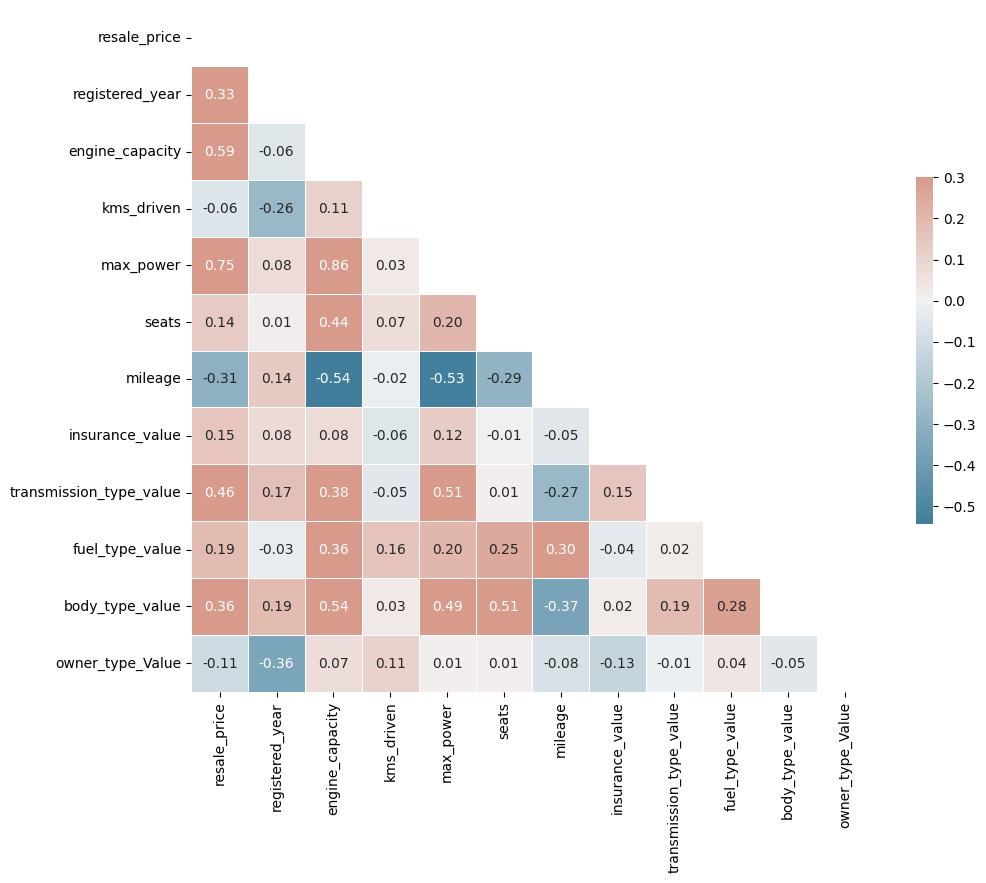

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
            annot=True, fmt=".2f")

plt.show()


## Observations:

**Positive Correlations**:
- There is a strong positive correlation (0.75) between "resale_price" and "max_power". This indicates that cars with higher horsepower tend to have higher resale prices.
- "resale_price" also has a moderate positive correlation with "engine_capacity" (0.59), indicating that cars with larger engine capacities generally have higher resale prices.
- "resale_price" is positively correlated with "transmission_type_value" (0.46), suggesting that certain types of transmissions may influence resale prices.

**Negative Correlations**:
- There is a moderate negative correlation (-0.32) between engine capacity and mileage, indicating that cars with larger engine capacities tend to have lower mileage, which is expected.
- "mileage" also has a negative correlation (-0.31) with "resale_price", indicating that cars with higher mileage tend to have lower resale prices.

**Weak Correlations**:
- "registered_year" has a weak positive correlation (0.33) with "resale_price", suggesting a slight increase in resale prices over the years.
- "kms_driven" shows weak correlations with most other variables, indicating limited influence on other features.

**Other Observations**:
- "seats" and "body_type_value" have moderate positive correlations with "resale_price" (0.14 and 0.36, respectively), indicating that cars with more seats and certain body types may have higher resale prices.
- "fuel_type_value" has a weak positive correlation with "resale_price" (0.19), suggesting that certain fuel types may influence resale prices to some extent.


####3 Pairwise Relationship Analysis and Correlation Visualization
#Explores pairwise relationships between numerical features using scatter plots.

<ipython-input-36-9cb3ee7000b0>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


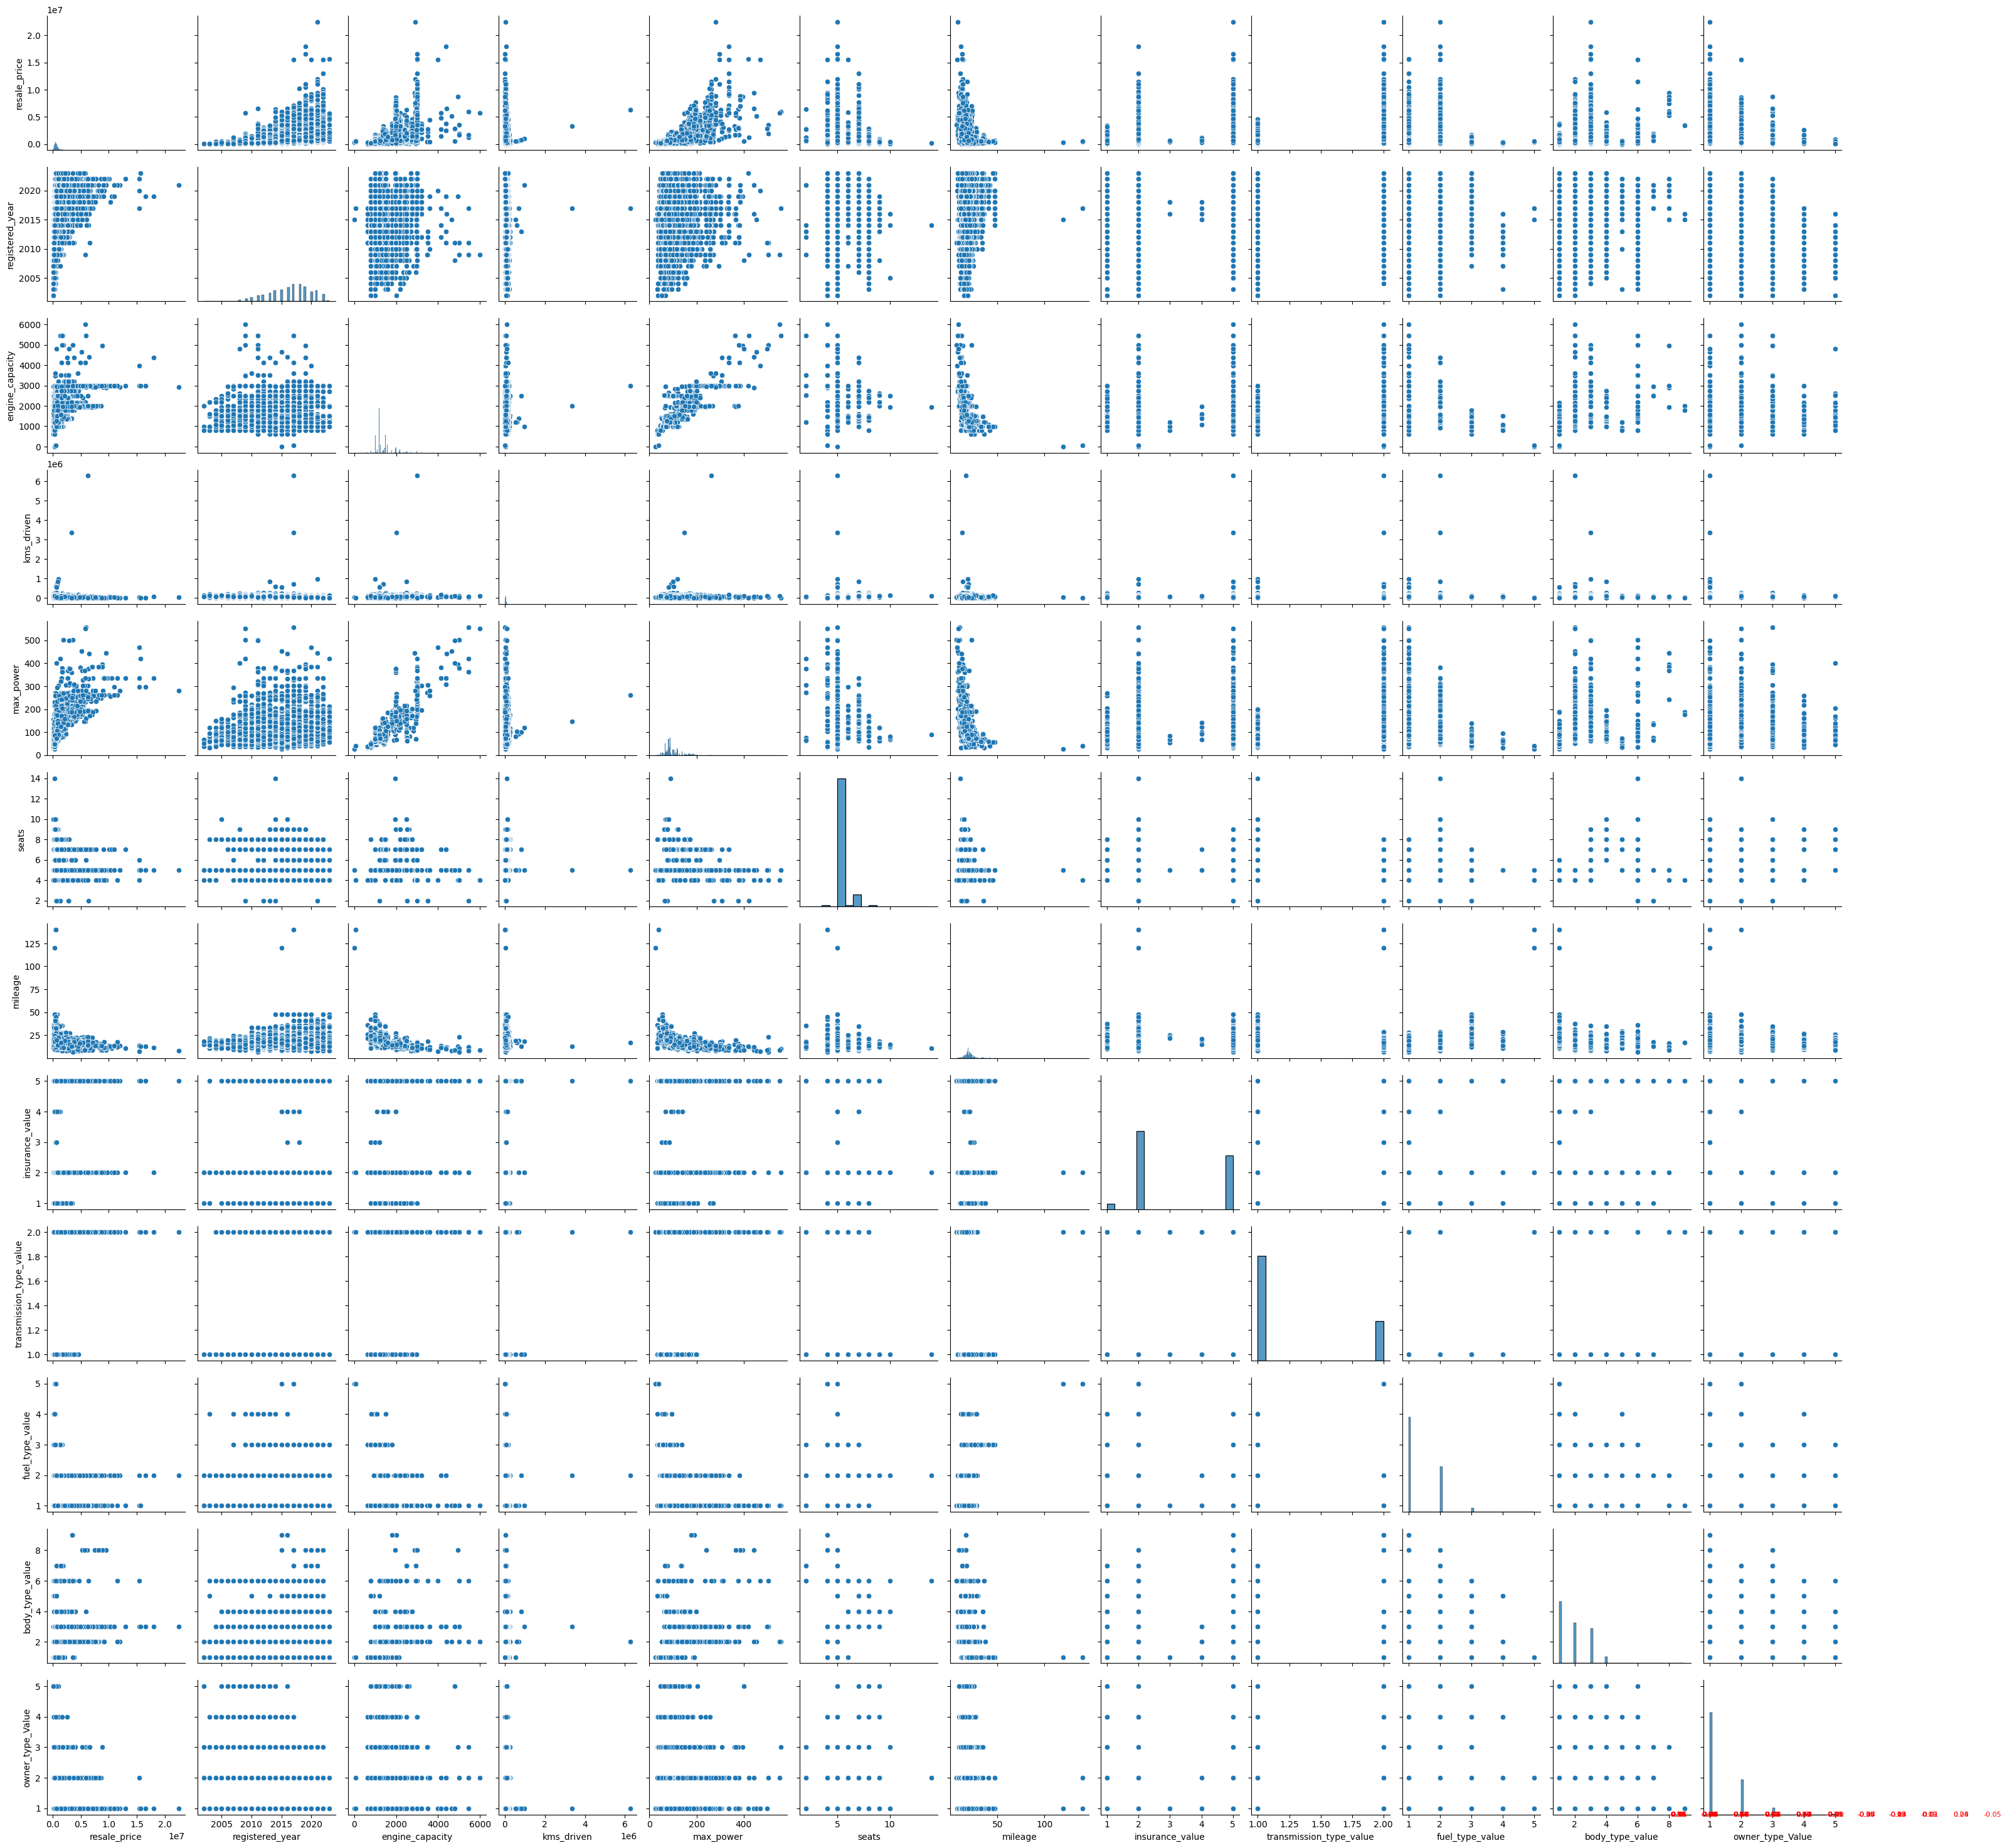

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create scatter plot matrix
sns.pairplot(data)

# Calculate correlation matrix
corr_matrix = data.corr()

# Add correlation coefficients to scatter plot matrix
for i, j in zip(*plt.np.triu_indices_from(plt.np.ones(corr_matrix.shape), k=1)):
    plt.text(i, j, f"{corr_matrix.iloc[i, j]:.2f}", ha='center', va='center', color='red', fontsize=8)

plt.show()


## Observations:

- We can see that there is some linear correlation between engine capacity and max power.
- We can see a cluster for price with the number of seats as a bucket(range).


####4 Categorical Variables Analysis and Numerical Distribution Visualization
#Examines the distribution of categorical variables and resale prices using bar plots and a box plot.

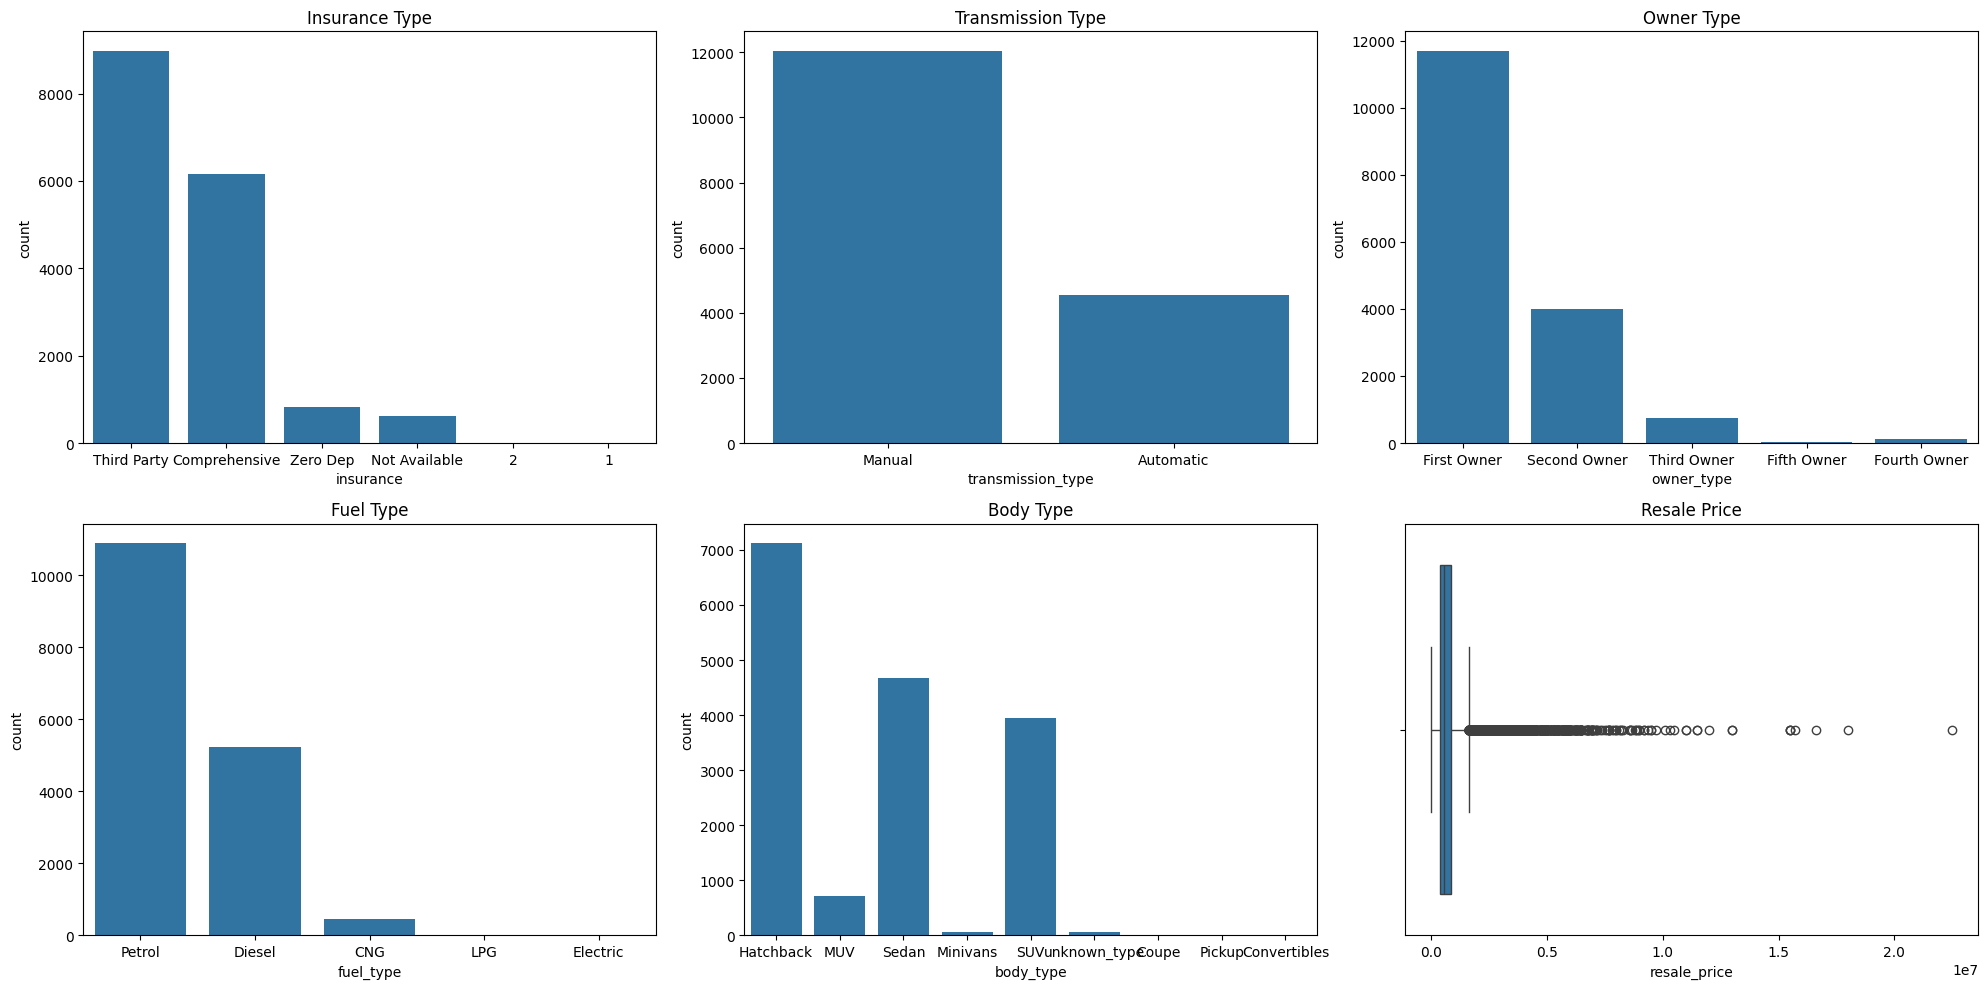

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes for subplots
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

# Bar plots for categorical columns
sns.countplot(x='insurance', data=data, ax=axes[0, 0])
axes[0, 0].set_title('Insurance Type')

sns.countplot(x='transmission_type', data=data, ax=axes[0, 1])
axes[0, 1].set_title('Transmission Type')

sns.countplot(x='owner_type', data=data, ax=axes[0, 2])
axes[0, 2].set_title('Owner Type')

sns.countplot(x='fuel_type', data=data, ax=axes[1, 0])
axes[1, 0].set_title('Fuel Type')

sns.countplot(x='body_type', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Body Type')

# Box plots for numerical columns
sns.boxplot(x='resale_price', data=data, ax=axes[1, 2])
axes[1, 2].set_title('Resale Price')

# Adjust layout
plt.tight_layout()
plt.show()


# Observations:
- We can see that the Indian market is dominated by certain categories. Most vehicles have insurance type as third party, manual transmission, petrol fuel type, and body types of hatchback and sedans.


####5. Resale Price Trend Analysis Over Time
#Illustrates the trend in resale prices over registered years using a line plot.

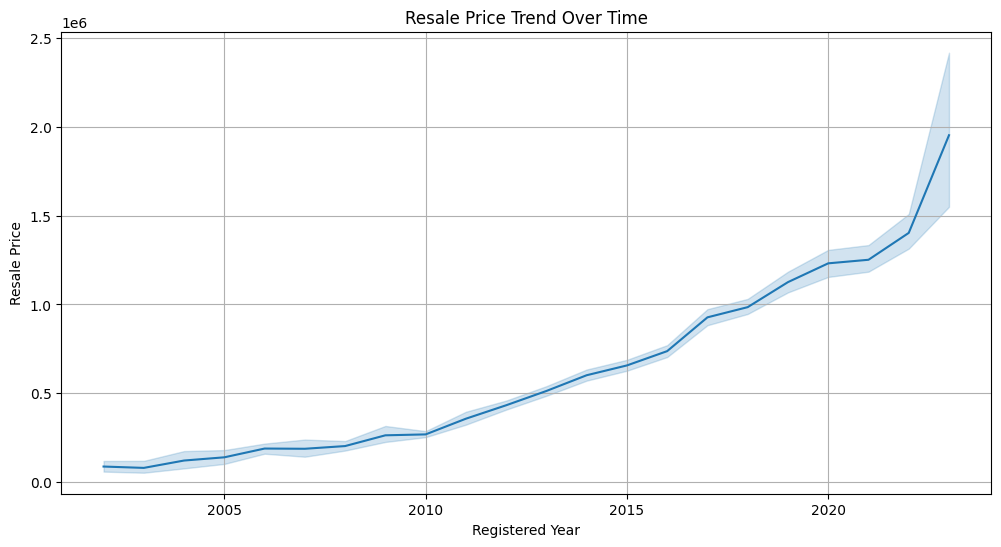

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Line plot for resale_price over registered_year
sns.lineplot(x='registered_year', y='resale_price', data=data)
plt.title('Resale Price Trend Over Time')
plt.xlabel('Registered Year')
plt.ylabel('Resale Price')
plt.grid(True)
plt.show()


# Observations:
- We can see a trend in price: the newer the car, the higher the value.


#### 6.Box Plot of Kilometers Driven by Owner Type and Fuel Type
#This plot visualizes the distribution of kilometers driven by different owner types, segmented by fuel types, using a box plot. The y-axis is log-scaled.

In [ ]:
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Create a DataFrame with column headings
df = pd.DataFrame(data, columns=['owner_type','kms_driven','fuel_type'])

# Print or use the DataFrame as needed
df.head()
fig = px.box(df,
             x='owner_type',
             y='kms_driven',
            color='fuel_type',
             title='Box Plot of kms_driven by Owner Type')

# Use log scaling for the y-axis
fig.update_yaxes(type="log")

fig.show()

# Observations:
- We can observe that as the number of owners increases, the kilometers driven range is getting shorter, indicating a clear trend that could be predicted.
- There are outliers for diesel vehicles throughout the different owner categories. Also, the maximum value sample is from the diesel fuel type.


####7.City-wise Distribution of Resale Cars in India
#This pie chart illustrates the proportion of resale cars across various cities in India based on the dataset, providing insights into the geographical distribution of the market


In [ ]:
labels = list(data.city.value_counts().index) #unique country
values = list(data.city.value_counts().values)#each country count of resturents
fig = go.Figure(data=[
        {
            "labels" : labels,
            "values" : values,
            "hoverinfo" : 'label+percent',
            "domain": {"x": [0, .9]},
            "hole" : 0.6,
            "type" : "pie",
            "rotation":120,
        },
    ],layout={
        "title" : "Resale Car's Presence across the India",
        "annotations": [
            {
                "font": {"size":20},
                "showarrow": True,
                "text": "Citie's",
                "x":0.2,
                "y":0.9,
            },
        ]
    })
fig.show()
fig.write_html('countrypie.html')




Quick Inferences -
Resale Cars largest market is in Delhi itself.

###8. Scaling and Correlation Analysis
#Scales numerical columns in a DataFrame data and computes correlation matrices for both the original and scaled data

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns


scaler = StandardScaler()
df_scaled = data.copy()
df_scaled[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [ ]:
original_corr = df.corr()
scaled_corr = df_scaled.corr()

<ipython-input-43-abc69ec30bc2>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-43-abc69ec30bc2>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [ ]:
print("Original Correlation Matrix:")
print(original_corr)

print("\nScaled Correlation Matrix:")
print(scaled_corr)


Original Correlation Matrix:
            kms_driven
kms_driven         1.0

Scaled Correlation Matrix:
                         resale_price  registered_year  engine_capacity  \
resale_price                 1.000000         0.326998         0.592993   
registered_year              0.326998         1.000000        -0.058688   
engine_capacity              0.592993        -0.058688         1.000000   
kms_driven                  -0.059554        -0.264622         0.112968   
max_power                    0.752995         0.078216         0.855189   
seats                        0.138085         0.013857         0.442691   
mileage                     -0.305482         0.140916        -0.543954   
insurance_value              0.153388         0.081909         0.078478   
transmission_type_value      0.461746         0.170421         0.375318   
fuel_type_value              0.189049        -0.028105         0.359203   
body_type_value              0.359576         0.189130         0.537285 

#Observations:
- We compared the correlation matrices between the original data and the scaled data. We observed that the correlation values between numerical features remained consistent before and after scaling. For example, the correlation between 'resale_price' and 'max_power' was 0.752995 before scaling and remained the same after scaling. Similarly, the correlation between 'engine_capacity' and 'mileage' was -0.543954 before scaling and remained the same after scaling. Scaling did not alter the relationship between numerical features, but it helped to standardize the scale of numerical values within a specified range, which is useful for machine learning algorithms that are sensitive to feature scales.


####9. Visualization of Data Distributions
#This code generates boxplots and histograms to visualize the distributions of numerical data, grouped by transmission type and insurance status.

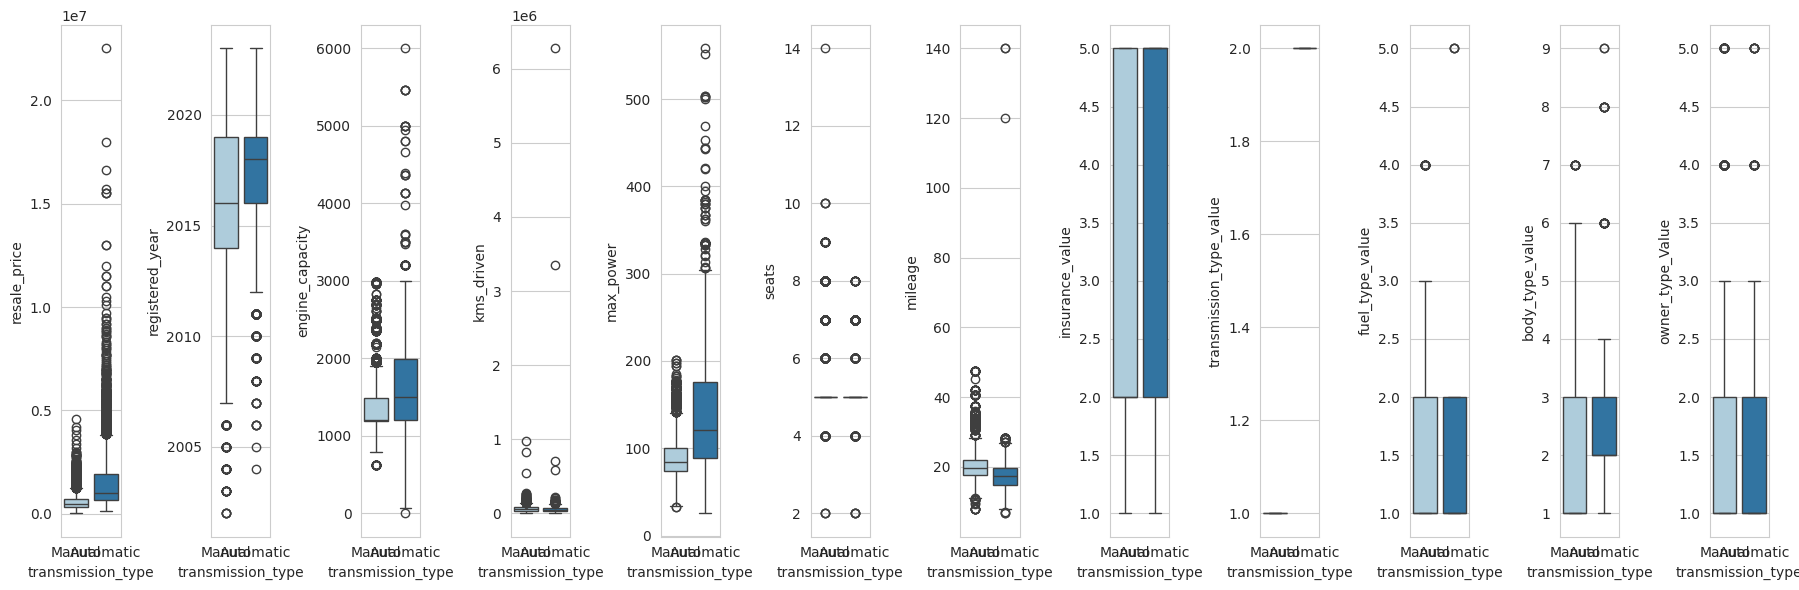

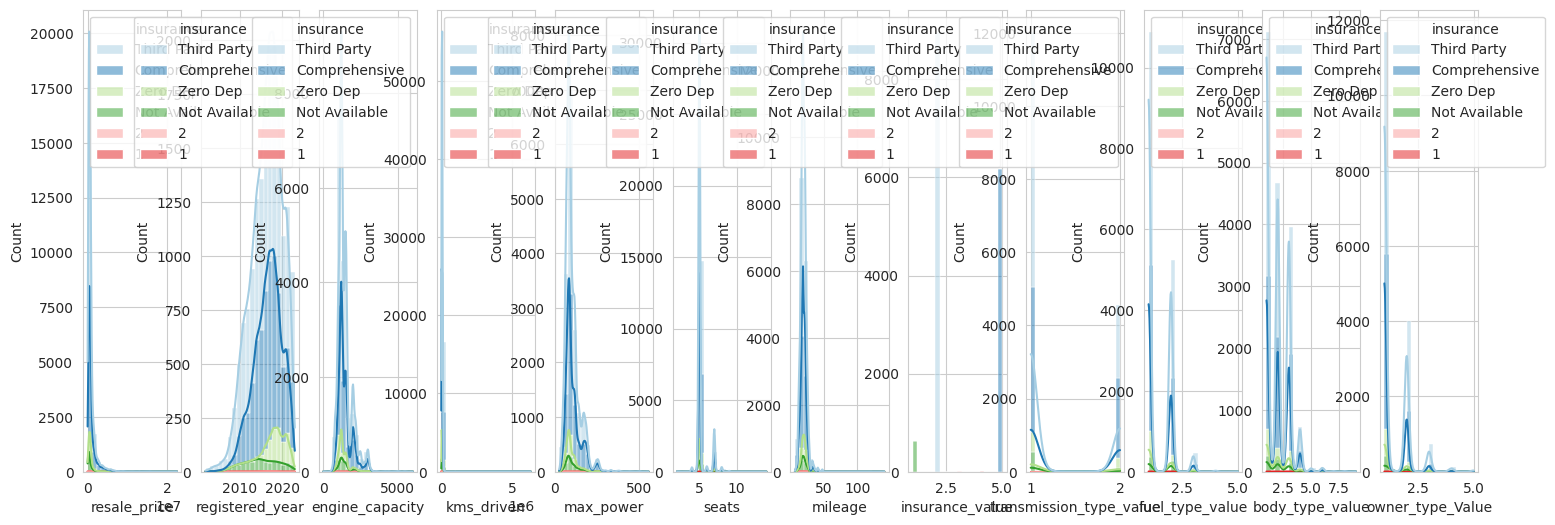

In [ ]:

import warnings
warnings.filterwarnings("ignore")
with sns.axes_style("whitegrid"):
  fig, axes = plt.subplots(1, len(numerical_cols), figsize=(18, 6))
  for i,j in enumerate(numerical_cols):
    axes[i] = sns.boxplot(x='transmission_type',y=j, data=data, ax = axes[i],palette='Paired')
    axes[i].set_xticklabels(data.transmission_type)
  plt.tight_layout()
  plt.show()

with sns.axes_style("whitegrid"):
  fig, axes = plt.subplots(1, len(numerical_cols), figsize=(18, 6))
  for i,j in enumerate(numerical_cols):
    axes[i] = sns.histplot(data=data, x = j,bins=20, kde=True, ax = axes[i],palette='Paired', hue='insurance', multiple='stack')
  plt.tight_layout()
  plt.show()

####10.Stacked Bar Plot of Resale Price by Insurance Type and Fuel Type
#This plot shows the average resale price of vehicles categorized by insurance type and fuel type, revealing trends in pricing across different vehicle types.

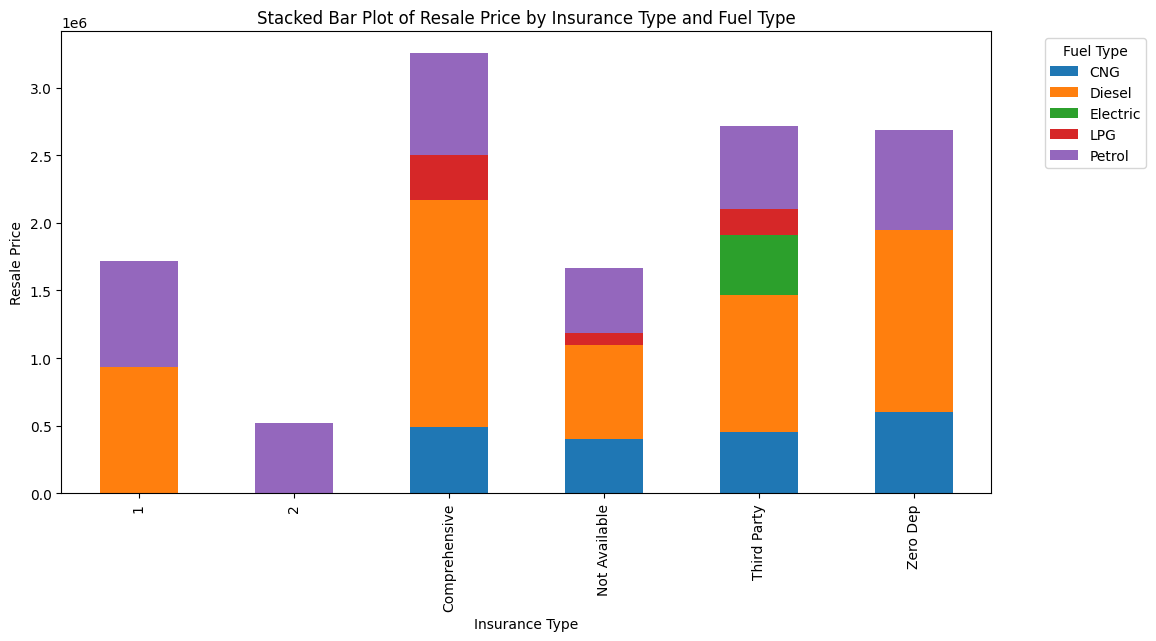

In [ ]:
pivot_table = data.pivot_table(index='insurance', columns='fuel_type', values='resale_price', aggfunc='mean')

# Plot the stacked bar plot
pivot_table.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Insurance Type')
plt.ylabel('Resale Price')
plt.title('Stacked Bar Plot of Resale Price by Insurance Type and Fuel Type')
plt.legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Observation:**
- There is a clear trend showing petrol vehicles dominating across all insurance types.
- Interestingly, all electric vehicles seem to prefer third-party insurance.


##END OF PHASE 1